# Laboratorio 0 por Francisco Rodríguez


In [616]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos
import pandas as pd                                 # Procesamiento de datos
from datos import OA_Ak                             # Importar token para API de OANDA
import numpy as np
from matplotlib.pyplot import hist

In [572]:
# token de OANDA
OA_In = "EUR_USD"                  # Instrumento
OA_Gn = "D"                        # Granularidad de velas
fini = pd.to_datetime("2019-07-06 00:00:00").tz_localize('GMT')  # Fecha inicial
ffin = pd.to_datetime("2019-12-06 00:00:00").tz_localize('GMT')  # Fecha final

# Descargar precios masivos
df_pe = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)


In [573]:
# -- --------------------------------------------------------------- Graficar OHLC plotly -- #

vs_grafica1 = vs.g_velas(p0_de=df_pe.iloc[0:120, :])
vs_grafica1.show()


In [574]:
# multiplicador de precios

pip_mult = 10000



# -- 0A.1: Hora

df_pe['hora'] = [df_pe['TimeStamp'][i].hour for i in range(0, len(df_pe['TimeStamp']))]



# -- 0A.2: Dia de la semana.

df_pe['dia'] = [df_pe['TimeStamp'][i].weekday() for i in range(0, len(df_pe['TimeStamp']))]

## Mes en el que ocurrió la vela.

In [575]:
#---0A.3: Mes 
df_pe['mes'] = [df_pe['TimeStamp'][i].month for i in range(0, len(df_pe['TimeStamp']))]

## Sesión de la vela

Función para establecer la sesión bursatil en la que occurio la vela siguiendo las siguientes especificaciones: 

+ Asia:  si en la columna ['hora'] tiene alguno de estos valores -> 22, 23, 0, 1, 2, 3, 4, 5, 6, 7
+ Asia_Europa: si en la columna ['hora'] tiene alguno de estos valores -> 8
+ Europa: si en la columna ['hora'] tiene alguno de estos valores -> 9, 10, 11, 12
+ Europa_America: si en la columna ['hora'] tiene alguno de estos valores -> 13, 14, 15, 16
+ America': si en la columna ['hora'] tiene alguno de estos valores -> 17, 18, 19, 20, 21

In [576]:
america = [17, 18, 19, 20, 21]
asia = [22, 23, 0, 1, 2, 3, 4, 5, 6, 7]
europa = [ 9, 10, 11, 12]
eurpa_america =[13, 14, 15, 16]

def sesion(hora):
    if hora in asia: 
        x = 'Asia'
    elif hora in america:
        x = 'America'
    elif hora in europa:
        x = 'Europa'
    elif hora in eurpa_america:
        x = 'Europa_America'
    else:
        x = 'europa_asia'
    return x

In [577]:
df_pe['Sesion'] = [sesion(int(df_pe['hora'][i])) for i in range(0, len(df_pe['hora']))]

In [578]:
df_pe['Sesion']

0      America
1      America
2      America
3      America
4      America
5      America
6      America
7      America
8      America
9      America
10     America
11     America
12     America
13     America
14     America
15     America
16     America
17     America
18     America
19     America
20     America
21     America
22     America
23     America
24     America
25     America
26     America
27     America
28     America
29     America
        ...   
101    America
102    America
103    America
104    America
105    America
106    America
107    America
108    America
109    America
110    America
111    America
112    America
113    America
114    America
115    America
116    America
117    America
118    America
119    America
120    America
121    America
122    America
123    America
124    America
125    America
126    America
127    America
128    America
129    America
130    America
Name: Sesion, Length: 131, dtype: object

In [579]:
df_pe.head()

,TimeStamp,Open,High,Low,Close,hora,dia,mes,Sesion
0,2019-07-05 20:00:00,1.12264,1.12278,1.12247,1.12255,20,4,7,America
1,2019-07-07 20:00:00,1.12248,1.12344,1.12071,1.12093,20,6,7,America
2,2019-07-08 20:00:00,1.12095,1.12188,1.11935,1.12066,20,0,7,America
3,2019-07-09 20:00:00,1.12070,1.12643,1.12020,1.12536,20,1,7,America
4,2019-07-10 20:00:00,1.12533,1.12858,1.12454,1.12570,20,2,7,America


## Amplitud de vela (en pips)

Creando un DataFrame para los precios de Close y Open para poder realizar la diferencia entre estos y multiplicarlo por 10,000 unidades para expresarla en pips

In [580]:
Close = pd.DataFrame(float(i) for i in df_pe['Close'])

Open = pd.DataFrame(float(i) for i in df_pe['Open'])


In [600]:
DifOyC = (Close - Open)*10000
DifOyC = pd.DataFrame(DifOyC)
DifOyC

,0
0,-0.9
1,-15.5
2,-2.9
3,46.6
4,3.7
5,14.4
6,-0.9
7,-13.5
8,-48.0
9,16.2


## Amplitud de extremos (en pips).

Creando un DataFrame para los precios de High y Low para poder realizar la diferencia entre estos y multiplicarlo por 10,000 unidades para expresarla en pips

In [584]:
High = pd.DataFrame(float(i) for i in df_pe['High'])

Low = pd.DataFrame(float(i) for i in df_pe['Low'])

In [592]:
DifHyL = (High - Low)*10000
DifHyL  =pd.DataFrame(DifHyL)
DifHyL

,0
0,3.1
1,27.3
2,25.3
3,62.3
4,40.4
5,36.8
6,4.3
7,30.7
8,61.5
9,33.8


## Sentido de la vela

En este paso se le asigna  el valor de 'alcista' para cuando ['Close'] >= ['Open'] y 'bajista' en el caso contrario.

In [587]:
sentido = (lambda Open, Close: 'ALCISTA' if Close >= Open else 'BAJISTA')

df_pe['Sentido'] = pd.DataFrame(sentido(df_pe['Open'][i], df_pe['Close'][i]) for i in range(len(df_pe['Open'])))



In [588]:
df_pe ['Sentido']

0      BAJISTA
1      BAJISTA
2      BAJISTA
3      ALCISTA
4      ALCISTA
5      ALCISTA
6      BAJISTA
7      BAJISTA
8      BAJISTA
9      ALCISTA
10     ALCISTA
11     BAJISTA
12     ALCISTA
13     BAJISTA
14     BAJISTA
15     BAJISTA
16     ALCISTA
17     BAJISTA
18     ALCISTA
19     ALCISTA
20     ALCISTA
21     BAJISTA
22     ALCISTA
23     ALCISTA
24     BAJISTA
25     ALCISTA
26     ALCISTA
27     ALCISTA
28     BAJISTA
29     ALCISTA
        ...   
101    ALCISTA
102    BAJISTA
103    BAJISTA
104    BAJISTA
105    BAJISTA
106    BAJISTA
107    BAJISTA
108    BAJISTA
109    ALCISTA
110    BAJISTA
111    BAJISTA
112    ALCISTA
113    ALCISTA
114    BAJISTA
115    ALCISTA
116    ALCISTA
117    BAJISTA
118    BAJISTA
119    BAJISTA
120    BAJISTA
121    BAJISTA
122    ALCISTA
123    BAJISTA
124    ALCISTA
125    ALCISTA
126    ALCISTA
127    ALCISTA
128    BAJISTA
129    BAJISTA
130    ALCISTA
Name: Sentido, Length: 131, dtype: object

In [589]:
df_pe.head()

,TimeStamp,Open,High,Low,Close,hora,dia,mes,Sesion,Sentido
0,2019-07-05 20:00:00,1.12264,1.12278,1.12247,1.12255,20,4,7,America,BAJISTA
1,2019-07-07 20:00:00,1.12248,1.12344,1.12071,1.12093,20,6,7,America,BAJISTA
2,2019-07-08 20:00:00,1.12095,1.12188,1.11935,1.12066,20,0,7,America,BAJISTA
3,2019-07-09 20:00:00,1.12070,1.12643,1.12020,1.12536,20,1,7,America,ALCISTA
4,2019-07-10 20:00:00,1.12533,1.12858,1.12454,1.12570,20,2,7,America,ALCISTA


## Conteo de velas consecutivas alcistas/bajistas. 

In [590]:
df_pe ['Sentido'].value_counts()

BAJISTA    72
ALCISTA    59
Name: Sentido, dtype: int64

## Ventanas móviles de volatilidad

## Gráfica

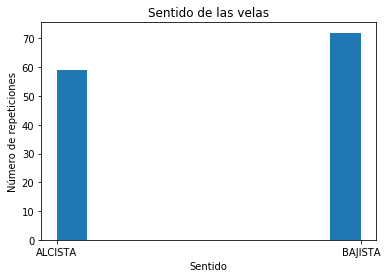

In [629]:
hist(df_pe['Sentido'])
plt.title("Sentido de las velas")
plt.ylabel("Número de repeticiones")
plt.xlabel("Sentido")
plt.show()
